In [1]:
import pandas as pd
from jcopml.plot import plot_missing_value
import numpy as np

In [2]:
df=pd.read_csv("data/titanic.csv",index_col="PassengerId")

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


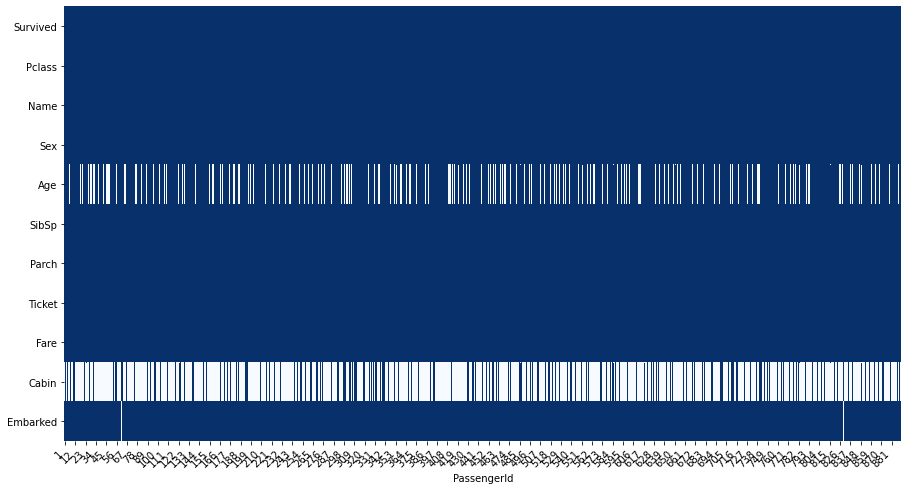

In [4]:
plot_missing_value(df)

In [5]:
df.drop(columns=["Cabin","Ticket"],inplace=True)

In [6]:
df.drop(columns=["Name"],inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df.Fare.max()

512.3292

## Analisis Target
* data klasifikasi = lihat jumlah datanya

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


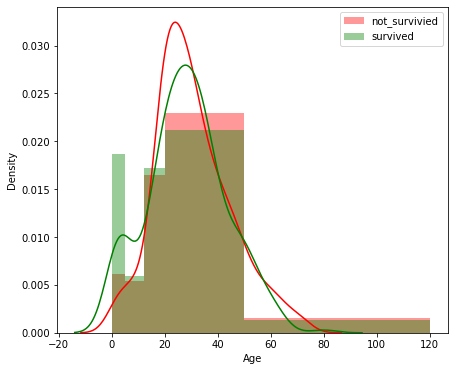

In [11]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived==0],bins=[0,5,12,20,50,120],label="not_survivied",color="r")
sns.distplot(df.Age[df.Survived==1],bins=[0,5,12,20,50,120],label="survived",color="g")
plt.legend()

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


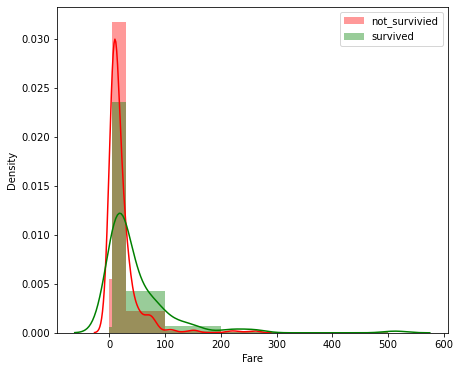

In [12]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived==0],bins=[0,5,30,100,200,500],label="not_survivied",color="r")
sns.distplot(df.Fare[df.Survived==1],bins=[0,5,30,100,200,500],label="survived",color="g")
plt.legend()

## informasi yang didapat
* dari data age bahwa umur anak anak 0-5 lebih banyak yang selamat
* dan dari data fare, bhawa yang membanyar dengan harga murah atau rentang dibawh 25 banyak yang tidak selamat
* maka dari data informasi baru ini bisa dijadikan feature engineering dengan membuat bining pada data

## analisis data kategorikal vs target
* lebih ke data kategorikal yang ordinal atau ada urutan nya (misalnya Pcalss)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahmat\anaconda3\li

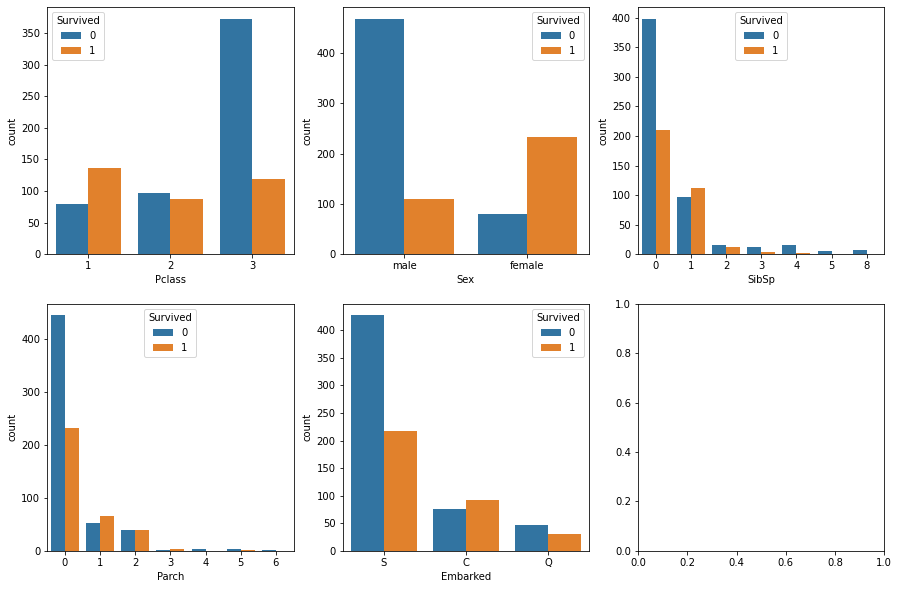

In [14]:
cat_var=["Pclass","Sex","SibSp","Parch","Embarked"]

fig, axes= plt.subplots(2,3,figsize=(15,10))
for cat,ax in zip(cat_var,axes.flatten()):
    sns.countplot(cat,data=df,hue="Survived",ax=ax)

## analsis informasi yang didapat
* pada class yang termurah atau 3 terdapat banyak yang not survived, dan pada kelas 1 lebih banyak sedikit yang survived
* male lebih banyak yang tidak survived
* Sibsp dan Parch terdapat banyak yang tidak survived pada 1 anggota, bisa diambil informasi isAlone apakah sendirian dan ini bisa masuk pada kolom baru sebagai informasi tambahan
* dan pada embarked dari S terdapat baynyak yang tidak survived

## analisis data dengan pandas crosstab
* lebih simpel dalam melakukan EDA

In [15]:
pd.crosstab(df.Pclass,df.Survived)
pd.crosstab(df.Pclass,df.Survived,normalize=True)

Survived,0,1
Pclass,,
1,0.089787,0.152637
2,0.108866,0.097643
3,0.417508,0.133558


## Setelah dapat informasi dari proses EDA maka bisa lakukan feature engineering pada data
* bisa lakukan add feature (seperti menambahkan kolom isAlone)
* bisa lakukan bining pada data numerikal agar data lebih bermakna

### adding feature=>isAlone

In [16]:
df.Parch==0

PassengerId
1       True
2       True
3       True
4       True
5       True
       ...  
887     True
888     True
889    False
890     True
891     True
Name: Parch, Length: 891, dtype: bool

In [17]:
df["isAlone"]=(df.Parch==0)&(df.SibSp==0)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


In [19]:
df.Age=pd.cut(df.Age,[0,5,12,20,50,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])

In [20]:
df.Fare=pd.cut(df.Fare,[0,25,100,600], labels=["murah","mahal","sangat_mahal"])

## Proses ML setelah melakukan featue Engineering

In [21]:
# dataset spliting
X=df.drop(columns='Survived')
y=df.Survived

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_train.shape

((712, 8), (179, 8), (712,), (712,))

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [25]:
numerical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("scaling",MinMaxScaler())
])

categorical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder())
])

In [26]:
from sklearn.compose import ColumnTransformer

In [27]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'isAlone'],
      dtype='object')

In [28]:
preprocessor=ColumnTransformer([
    ("numeric",numerical_pipeline,["SibSp","Parch"]),
    ("kategoric",categorical_pipeline,["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])

TypeError: 'Pipeline' object is not callable

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier())
    
])
parameter={
    "knn__n_neighbors":np.arange(1,51,2),
    "knn__weights":["uniform","distance"],
    "knn__p": [1,1.5,2]
}


model=GridSearchCV(pipeline,param_grid=parameter,n_jobs=-1,cv=4,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

In [ ]:
import pandas as pd
from jcopml.plot import plot_missing_value
import numpy as np

In [ ]:
df=pd.read_csv("data/titanic.csv",index_col="PassengerId")
df.drop(columns=["Cabin","Ticket"],inplace=True)

df["isAlone"]=(df.Parch==0)&(df.SibSp==0)

df.Age=pd.cut(df.Age,[0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])
df.Fare=pd.cut(df.Fare,[0,25,50,75,600], labels=["murah","sedang","mahal","sangat_mahal"])

X=df.drop(columns='Survived')
y=df.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("scaling",MinMaxScaler())
])

categorical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder())
])

from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([
    ("numeric",numerical_pipeline,["SibSp","Parch"]),
    ("kategoric",categorical_pipeline,["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier())
    
])
parameter={
    "knn__n_neighbors":np.arange(1,51,2),
    "knn__weights":["uniform","distance"],
    "knn__p": [1,1.5,2]
}


model=GridSearchCV(pipeline,param_grid=parameter,n_jobs=-1,cv=3,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

In [ ]:
df=pd.read_csv("data/titanic.csv",index_col="PassengerId")
df.drop(columns=["Cabin","Ticket"],inplace=True)

df["isAlone"]=(df.Parch==0)&(df.SibSp==0)

df.Age=pd.cut(df.Age,[0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])
df.Fare=pd.cut(df.Fare,[0,25,50,75,600], labels=["murah","sedang","mahal","sangat_mahal"])

X=df.drop(columns='Survived')
y=df.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe,cat_pipe


from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([
    ("numeric",num_pipe(scaling='minmax'),["SibSp","Parch"]),
    ("kategoric",cat_pipe(encoder='onehot'),["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier())
    
])

model=GridSearchCV(pipeline,gsp.knn_params,cv=3,n_jobs=-1,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

In [ ]:
gsp.knn_params

In [ ]:
df=pd.read_csv("data/titanic.csv",index_col="PassengerId")
df.drop(columns=["Cabin","Ticket"],inplace=True)
df["isAlone"]=(df.Parch==0)&(df.SibSp==0)
df.isAlone=df.isAlone.astype(int)
df.Age=pd.cut(df.Age,[0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])
df.Fare=pd.cut(df.Fare,[0,25,50,75,600], labels=["murah","sedang","mahal","sangat_mahal"])

In [ ]:
df["title"]=df.Name.apply(lambda x: (x.split(", ")[1]).split(".")[0])
df.drop(columns="Name",inplace=True)
df.head()

In [ ]:
def modif_title(x):
    if x in ['Mr','Mrs','Miss','Master']:
        return x
    else:
        return "other"

In [ ]:
df.title.value_counts()

In [ ]:
df["title"]=df.title.apply(modif_title)
df.head()

In [ ]:





X=df.drop(columns='Survived')
y=df.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("scaling",MinMaxScaler())
])

categorical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder())
])

from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([
    ("numeric",numerical_pipeline,["SibSp","Parch"]),
    ("kategoric",categorical_pipeline,["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier())
    
])
parameter={
    "knn__n_neighbors":np.arange(1,51,2),
    "knn__weights":["uniform","distance"],
    "knn__p": [1,1.5,2]
}


model=GridSearchCV(pipeline,param_grid=parameter,n_jobs=-1,cv=3,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

In [ ]:
df=pd.read_csv("data/titanic.csv",index_col="PassengerId")
df.drop(columns=["Cabin","Ticket"],inplace=True)

df["isAlone"]=(df.Parch==0)&(df.SibSp==0)
df.isAlone=df.isAlone.astype(int)

df.Age=pd.cut(df.Age,[0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])
df.Fare=pd.cut(df.Fare,[0,25,100,600], labels=["murah","mahal","eksklusif"])


df["title"]=df.Name.apply(lambda x: (x.split(", ")[1]).split(".")[0])
df.drop(columns="Name",inplace=True)
df.head()


def modif_title(x):
    if x in ['Mr','Mrs','Miss','Master']:
        return x
    else:
        return "other"

df["title"]=df.title.apply(modif_title)
df.head()

X=df.drop(columns='Survived')
y=df.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("scaling",MinMaxScaler())
])

categorical_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder())
])

from sklearn.compose import ColumnTransformer

preprocessor=ColumnTransformer([
    ("numeric",numerical_pipeline,["SibSp","Parch"]),
    ("kategoric",categorical_pipeline,["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline=Pipeline([
    ("preprocessor",preprocessor),
    ("knn",KNeighborsClassifier())
    
])
parameter={
    "knn__n_neighbors":np.arange(1,51,2),
    "knn__weights":["uniform","distance"],
    "knn__p": [1,1.5, 2]
}


model=GridSearchCV(pipeline,param_grid=parameter,n_jobs=-1,cv=3,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC()